In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

from scipy.stats import linregress
import seaborn as sns

plt.style.use('fivethirtyeight')
import ipywidgets as widgets
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual

### MRSA Data Cleaning (DONE)

In [114]:
# mrsa_2013_raw = pd.read_csv('mrsa raw data/mrsa-in-hospitals-2013.csv')
# mrsa_2014_raw = pd.read_csv('mrsa raw data/mrsa-in-hospitals-2014.csv')
# mrsa_2015_raw = pd.read_csv('mrsa raw data/mrsa-in-hospitals-2015.csv')

In [115]:
# # read in 2016-18 
# import chardet
# import pandas as pd

# with open('mrsa raw data/mrsa-in-hospitals-2016.csv', 'rb') as f:
#     result = chardet.detect(f.read())
    
# mrsa_2016_raw = pd.read_csv('mrsa raw data/mrsa-in-hospitals-2016.csv', encoding=result['encoding'])

In [116]:
# # read in 2016-18 
# import chardet
# import pandas as pd

# with open('mrsa raw data/mrsa-in-hospitals-2017.csv', 'rb') as f:
#     result = chardet.detect(f.read())
    
# mrsa_2017_raw = pd.read_csv('mrsa raw data/mrsa-in-hospitals-2017.csv', encoding=result['encoding'])

In [117]:
# # read in 2016-18 
# import chardet
# import pandas as pd

# with open('mrsa raw data/mrsa-in-hospitals-2018.csv', 'rb') as f:
#     result = chardet.detect(f.read())
    
# mrsa_2018_raw = pd.read_csv('mrsa raw data/mrsa-in-hospitals-2018.csv', encoding=result['encoding'])

In [118]:
# mrsa_2013 = mrsa_2013_raw[['Year ','State','HAI','Facility_Name1',
#                         'FACID1','County','Infection_Count','Patient_Days']].dropna()
# mrsa_2013 = mrsa_2013.rename(columns={'Year ':'Year','Facility_Name1':'Facility1',
#                                       'FACID1':'Facility1_ID','Patient_Days':'Num_patients'})
# mrsa_2013 = mrsa_2013.drop(mrsa_2013.loc[mrsa_2013["County"] == 'Kings-Fresno'].index)

In [119]:
# mrsa_2014 = mrsa_2014_raw[['Year','State','HAI','Facility_Name1','Facility_ID1','County','Cases','Patient_Days',]].dropna()
# mrsa_2014 = mrsa_2014.rename(columns={'Facility_Name1':'Facility1','Facility_ID1':'Facility1_ID','Cases':'Infection_Count',
#                                        'Patient_Days':'Num_patients'})

In [121]:
# mrsa_2015 = mrsa_2015_raw[['Year','State','HAI','Facility_Name1','Facility_ID1','County','Hospital_Onset_Cases',
#                            'Patient_Days']].dropna()
# mrsa_2015 = mrsa_2015.rename(columns={'Facility_Name1':'Facility1','Facility_ID1':'Facility1_ID',
#                                       'Hospital_Onset_Cases':'Infection_Count','Patient_Days':'Num_patients',})

In [122]:
# mrsa_2016 = mrsa_2016_raw[['Year','State','HAI','Facility_Name','Facility_ID','County','Infections_Reported',
#                            'Patient_Days']].dropna()
# mrsa_2016 = mrsa_2016.rename(columns={'Facility_Name':'Facility1','Facility_ID':'Facility1_ID',
#                                       'Infections_Reported':'Infection_Count','Patient_Days':'Num_patients'})

In [123]:
# mrsa_2017 = mrsa_2017_raw[['Year','State','HAI','Facility_Name','Facility_ID','County','Infections_Reported',
#                            'Patient_Days']].dropna()
# mrsa_2017 = mrsa_2017.rename(columns={'Facility_Name':'Facility1','Facility_ID':'Facility1_ID',
#                                       'Infections_Reported':'Infection_Count','Patient_Days':'Num_patients'})

In [125]:
# mrsa_2018 = mrsa_2018_raw[['Year','State','HAI','Facility_Name','Facility_ID','County','Infections_Reported',
#                            'Patient_Days']].dropna()
# mrsa_2018 = mrsa_2018.rename(columns={'Facility_Name':'Facility1','Facility_ID':'Facility1_ID',
#                                       'Infections_Reported':'Infection_Count','Patient_Days':'Num_patients'})

In [126]:
# mrsa_2013.to_csv('mrsa cleaned data/mrsa_2013.csv',index=False)
# mrsa_2014.to_csv('mrsa cleaned data/mrsa_2014.csv',index=False)
# mrsa_2015.to_csv('mrsa cleaned data/mrsa_2015.csv',index=False)
# mrsa_2016.to_csv('mrsa cleaned data/mrsa_2016.csv',index=False)
# mrsa_2017.to_csv('mrsa cleaned data/mrsa_2017.csv',index=False)
# mrsa_2018.to_csv('mrsa cleaned data/mrsa_2018.csv',index=False)

In [127]:
# mrsa_merged = pd.concat([mrsa_2013, mrsa_2014, mrsa_2015, mrsa_2016, mrsa_2017, mrsa_2018],ignore_index=True)

# mrsa_merged.to_csv('mrsa cleaned data/mrsa_merged.csv',index=False)

### EDA

In [10]:
#load in mrsa data

mrsa_2013 = pd.read_csv('mrsa cleaned data/mrsa_2013.csv')
mrsa_2014 = pd.read_csv('mrsa cleaned data/mrsa_2014.csv')
mrsa_2015 = pd.read_csv('mrsa cleaned data/mrsa_2015.csv')
mrsa_2016 = pd.read_csv('mrsa cleaned data/mrsa_2016.csv')
mrsa_2017 = pd.read_csv('mrsa cleaned data/mrsa_2017.csv')
mrsa_2018 = pd.read_csv('mrsa cleaned data/mrsa_2018.csv')

mrsa_merged = pd.read_csv('mrsa_merged.csv')

In [130]:
mrsa_2013.head()

,Year,State,HAI,Facility1,Facility1_ID,County,Infection_Count,Num_patients
0,2013,California,Methicillin-Resistant Staphylococcus aureus Bl...,"Adventist Medical Center, Reedley",40000124,Fresno,0.0,5970.0
1,2013,California,Methicillin-Resistant Staphylococcus aureus Bl...,"AHMC Anaheim Regional Medical Center, Anaheim",60000002,Orange,3.0,51929.0
2,2013,California,Methicillin-Resistant Staphylococcus aureus Bl...,"Alameda County Medical Center, Oakland",140000034,Alameda,7.0,55590.0
3,2013,California,Methicillin-Resistant Staphylococcus aureus Bl...,Alameda Hospital,140000011,Alameda,0.0,11520.0
4,2013,California,Methicillin-Resistant Staphylococcus aureus Bl...,Alhambra Hospital Medical Center,930000005,Los Angeles,0.0,19433.0


(array([214.,  71.,  37.,  15.,   7.,   2.,   1.,   1.,   3.,   2.]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <a list of 10 Patch objects>)

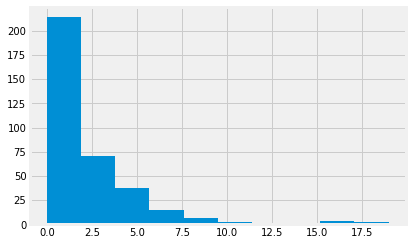

In [131]:
### Histogram of Infection Counts ###

plt.hist(mrsa_2013['Infection_Count'])

(array([297.,  41.,   8.,   6.,   2.,   1.,   0.,   1.,   1.,   1.]),
 array([ 0. ,  3.2,  6.4,  9.6, 12.8, 16. , 19.2, 22.4, 25.6, 28.8, 32. ]),
 <a list of 10 Patch objects>)

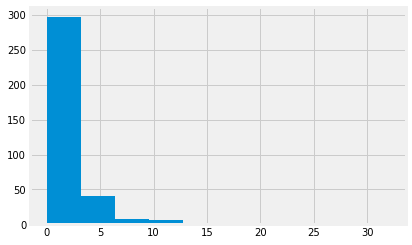

In [132]:
plt.hist(mrsa_2014['Infection_Count'])

(array([258.,  52.,  34.,   6.,   5.,   0.,   3.,   1.,   0.,   3.]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ]),
 <a list of 10 Patch objects>)

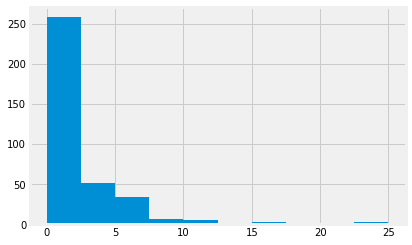

In [133]:
plt.hist(mrsa_2015['Infection_Count'])

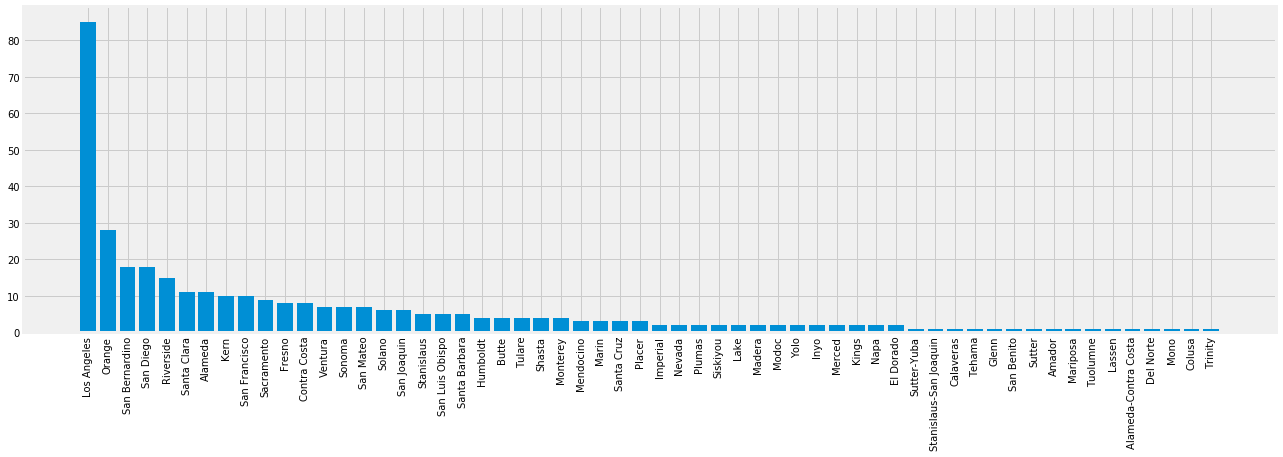

In [134]:
### Bar plots of County Count ### 

plt.figure(figsize=(20,6))

plt.bar(mrsa_2013['County'].value_counts().index, mrsa_2013['County'].value_counts());

plt.xticks(rotation=90);

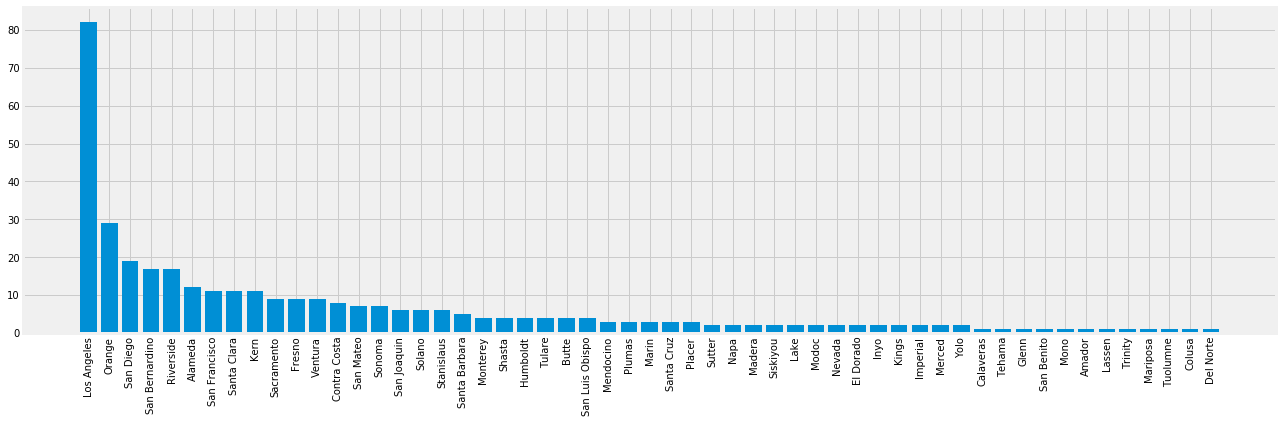

In [135]:
plt.figure(figsize=(20,6))

plt.bar(mrsa_2014['County'].value_counts().index, mrsa_2014['County'].value_counts());

plt.xticks(rotation=90);

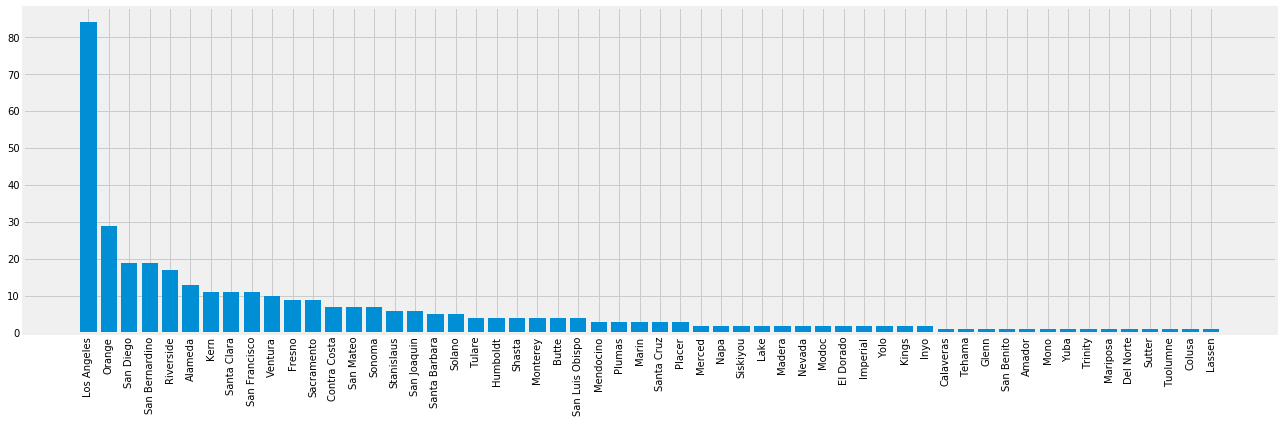

In [136]:
plt.figure(figsize=(20,6))

plt.bar(mrsa_2015['County'].value_counts().index, mrsa_2015['County'].value_counts());

plt.xticks(rotation=90);

In [137]:
# below we tried to plot infection rates in LA county as reported by each unique hospital per data set. 
# However, it seems that not all of the same hospitals were used to record infection count over each year 

# Confusion: What is a useful plot to graph for infection rate by year by county (Sec 5c)
# 

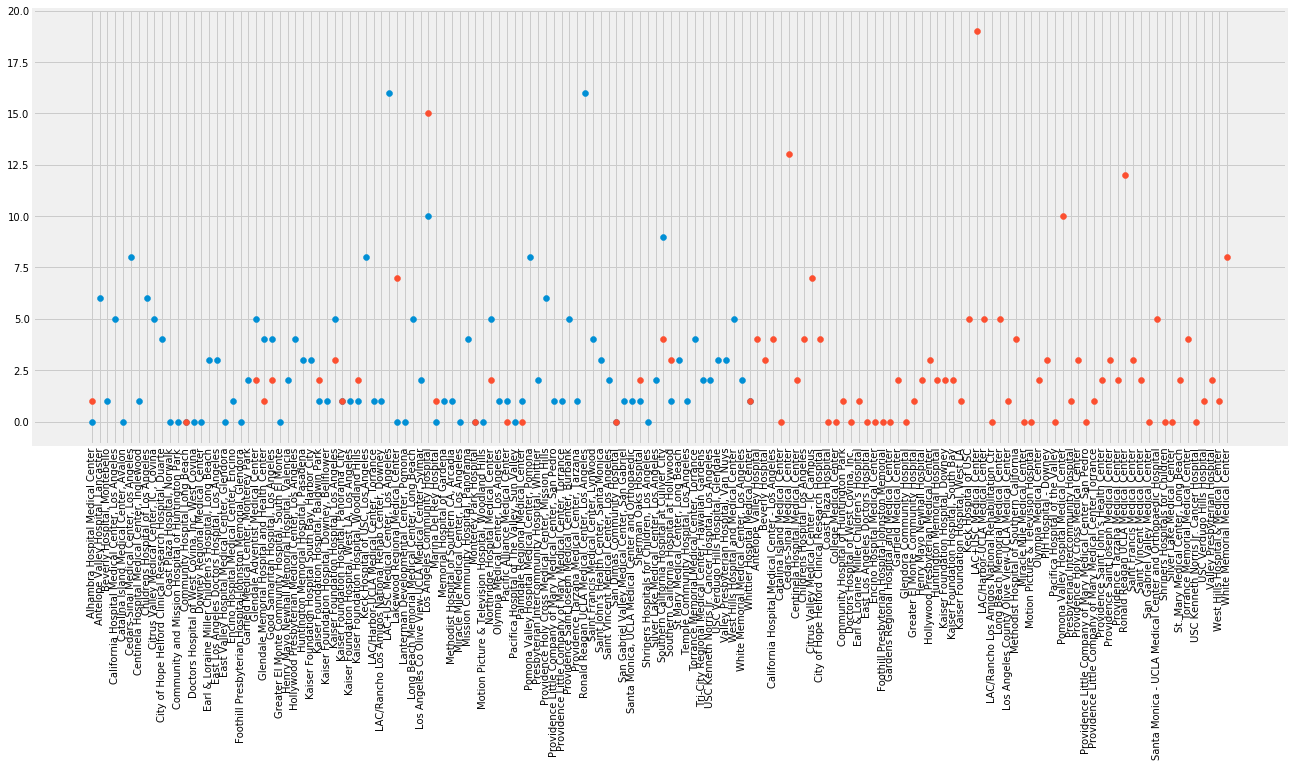

In [138]:
## Infection Rate by County by Year
plt.figure(figsize=(20,8))
la_2013 = mrsa_2013.loc[mrsa_2013['County'] == 'Los Angeles']
la_2014 = mrsa_2014.loc[mrsa_2014['County'] == 'Los Angeles']
la_2015 = mrsa_2015.loc[mrsa_2015['County'] == 'Los Angeles']

hospitals = la_2013['Facility1']
la_2013 = mrsa_2013.loc[mrsa_2013['County'] == 'Los Angeles']
la_2014 = mrsa_2014.loc[mrsa_2014['County'] == 'Los Angeles']


plt.scatter(hospitals, la_2013['Infection_Count'])
plt.scatter(la_2014['Facility1'], la_2014['Infection_Count'])

plt.xticks(rotation=90);

In [139]:
la_2013.columns

Index(['Year', 'State', 'HAI', 'Facility1', 'Facility1_ID', 'County',
       'Infection_Count', 'Num_patients'],
      dtype='object')

In [140]:
len(la_2014['Facility1'].unique()) == len(la_2013['Facility1'].unique())

False

In [141]:
a = ['a','b','c']
b = ['b','c','d']

ab = [set(a) & set(b)]
ab

[{'b', 'c'}]

In [142]:
len(la_2013['Facility1']), len(la_2014['Facility1']), len(la_2015['Facility1']) # not the same hospitals

(85, 82, 84)

In [143]:
la_2015 = mrsa_2015.loc[mrsa_2015['County'] == 'Los Angeles']

#[set(la_2014['Facility_Name1']) & set(la_2015['Facility_Name1'])]

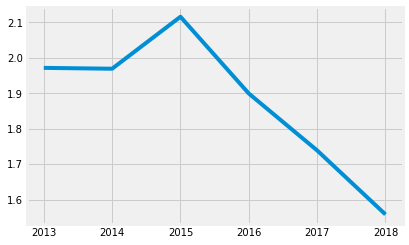

In [144]:
# infection rates by year
avg_inf_year = [np.mean(mrsa_2013['Infection_Count']),
                np.mean(mrsa_2014['Infection_Count']),
                np.mean(mrsa_2015['Infection_Count']),
                np.mean(mrsa_2016['Infection_Count']),
                np.mean(mrsa_2017['Infection_Count']),
                np.mean(mrsa_2018['Infection_Count'])]

plt.plot(['2013','2014','2015','2016','2017','2018'],avg_inf_year) #one possible version of 5B 

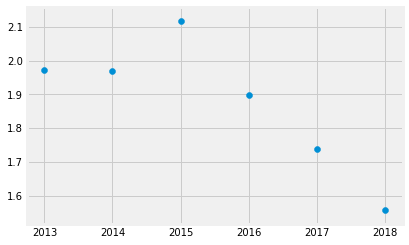

In [145]:
plt.scatter(['2013','2014','2015','2016','2017','2018'],avg_inf_year) #another version of 5B 

In [146]:
merge_1 = pd.merge(mrsa_2013, mrsa_2014, 
         how='outer',on='County').dropna()

In [147]:
mrsa_2015.head()

,Year,State,HAI,Facility1,Facility1_ID,County,Infection_Count,Num_patients
0,2015,California,Methicillin-Resistant Staphylococcus aureus Bl...,Adventist Medical Center,630012960,Kings,2,33672
1,2015,California,Methicillin-Resistant Staphylococcus aureus Bl...,Adventist Medical Center - Reedley,40000124,Fresno,0,7125
2,2015,California,Methicillin-Resistant Staphylococcus aureus Bl...,Adventist Medical Center - Selma,40000122,Fresno,0,7286
3,2015,California,Methicillin-Resistant Staphylococcus aureus Bl...,AHMC Anaheim Regional Medical Center,60000002,Orange,0,49819
4,2015,California,Methicillin-Resistant Staphylococcus aureus Bl...,Alameda Hospital,140000011,Alameda,0,14217


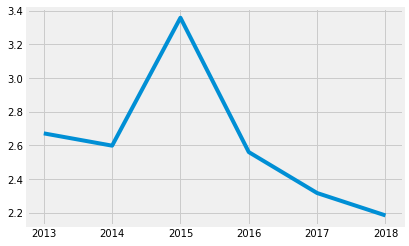

In [148]:
# trying again by county - plot average infection rate per year for each county

la_2013 = mrsa_2013.loc[mrsa_2013['County'] == 'Los Angeles']
la_2014 = mrsa_2014.loc[mrsa_2014['County'] == 'Los Angeles']
la_2015 = mrsa_2015.loc[mrsa_2015['County'] == 'Los Angeles']
la_2016 = mrsa_2016.loc[mrsa_2016['County'] == 'Los Angeles']
la_2017 = mrsa_2017.loc[mrsa_2017['County'] == 'Los Angeles']
la_2018 = mrsa_2018.loc[mrsa_2018['County'] == 'Los Angeles']



avg_inf_year_la = [np.mean(la_2013['Infection_Count']),
                   np.mean(la_2014['Infection_Count']), 
                   np.mean(la_2015['Infection_Count']), 
                   np.mean(la_2016['Infection_Count']),
                   np.mean(la_2017['Infection_Count']), 
                   np.mean(la_2018['Infection_Count'])]

plt.plot(['2013','2014','2015','2016','2017','2018'],avg_inf_year_la)

In [149]:
mrsa_merged.loc[mrsa_merged['County'] == 'Kings-Fresno']

,Year,State,HAI,Facility1,Facility1_ID,County,Infection_Count,Num_patients


In [181]:
def line_county(County):
    plt.figure(figsize=(10,7));
    x = list(mrsa_merged.loc[mrsa_merged['County']== County].groupby(['Year']).agg(sum).index)
    y = list(mrsa_merged.loc[mrsa_merged['County']== County].groupby(['Year']).agg(sum)['Infection_Count'])
    return sns.scatterplot(x,y)

wid_1 = widgets.Dropdown(
        options = mrsa_merged['County'].unique().tolist(),
        description = 'County',
        disabled = False
)

interact(line_county, County = wid_1)

interactive(children=(Dropdown(description='County', options=('Fresno', 'Orange', 'Alameda', 'Los Angeles', 'S…

<function __main__.line_county(County)>

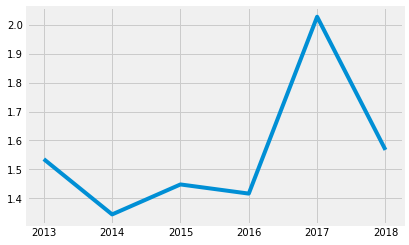

In [151]:
# trying again by county - plot average infection rate per year for each county

orange_2013 = mrsa_2013.loc[mrsa_2013['County'] == 'Orange']
orange_2014 = mrsa_2014.loc[mrsa_2014['County'] == 'Orange']
orange_2015 = mrsa_2015.loc[mrsa_2015['County'] == 'Orange']
orange_2016 = mrsa_2016.loc[mrsa_2016['County'] == 'Orange']
orange_2017 = mrsa_2017.loc[mrsa_2017['County'] == 'Orange']
orange_2018 = mrsa_2018.loc[mrsa_2018['County'] == 'Orange']



avg_inf_year_orange = [np.mean(orange_2013['Infection_Count']),
                   np.mean(orange_2014['Infection_Count']), 
                   np.mean(orange_2015['Infection_Count']), 
                   np.mean(orange_2016['Infection_Count']),
                   np.mean(orange_2017['Infection_Count']), 
                   np.mean(orange_2018['Infection_Count'])]

plt.plot(['2013','2014','2015','2016','2017','2018'],avg_inf_year_orange)

In [152]:
avg_inf_year_orange

[1.5357142857142858,
 1.3448275862068966,
 1.4482758620689655,
 1.4166666666666667,
 2.027027027027027,
 1.5675675675675675]

In [153]:
la_2015.head()

,Year,State,HAI,Facility1,Facility1_ID,County,Infection_Count,Num_patients
5,2015,California,Methicillin-Resistant Staphylococcus aureus Bl...,Alhambra Hospital Medical Center,930000005,Los Angeles,1,16823
10,2015,California,Methicillin-Resistant Staphylococcus aureus Bl...,Antelope Valley Hospital,930000008,Los Angeles,3,90048
18,2015,California,Methicillin-Resistant Staphylococcus aureus Bl...,Beverly Hospital,930000012,Los Angeles,4,38986
19,2015,California,Methicillin-Resistant Staphylococcus aureus Bl...,California Hospital Medical Center - Los Angeles,930000002,Los Angeles,7,80800
24,2015,California,Methicillin-Resistant Staphylococcus aureus Bl...,Catalina Island Medical Center,930000013,Los Angeles,0,234


### Population Data Cleaning (DONE)

In [154]:
# # population versus infection

# census_raw = pd.read_csv('cc-est2018-alldata-06.csv')
# census = census_raw[['CTYNAME','YEAR','TOT_POP']]

# # @Elias: is it ok to only keep these 3 columns? other columns won't be used necessarily


In [155]:
# # keep only relevant years
# census = census[census['YEAR'].isin([6,7,8,9,10,11])]

# # rename year numbers to actual years
# year_dict = {6:2013,7:2014,8:2015,9:2016,10:2017,11:2018}
# census['YEAR'] = census['YEAR'].replace(year_dict)
# census = census.rename(columns={"CTYNAME":"County", "YEAR":"Year","TOT_POP":"Total_Population"})

# census.to_csv('census_cleaned.csv',index=False)

# Pop Data EDA

In [11]:
census = pd.read_csv('census_cleaned.csv')#.drop(['Unnamed: 0'],axis=1)
census.head()

,County,Year,Total_Population
0,Alameda County,2013,1580247
1,Alameda County,2013,97356
2,Alameda County,2013,98218
3,Alameda County,2013,92259
4,Alameda County,2013,95483


In [8]:
pop_by_county = census.groupby(['Year','County']).agg(sum)
pop_by_county.head()

Total_Population
Year County                            
2013 Alameda County             3160494
     Alpine County                 2254
     Amador County                73250
     Butte County                443328
     Calaveras County             89320

In [9]:
pop_by_county = pop_by_county.reset_index()
pop_by_county['County'] = pop_by_county['County'].apply(lambda county_name:re.sub(r' County',"",county_name))
pop_by_county.head()

,Year,County,Total_Population
0,2013,Alameda,3160494
1,2013,Alpine,2254
2,2013,Amador,73250
3,2013,Butte,443328
4,2013,Calaveras,89320


In [ ]:
infec_2013 = list(mrsa_2013.groupby(['County']).agg(sum)['Infection_Count'])
infec_2014 = list(mrsa_2014.groupby(['County']).agg(sum)['Infection_Count'])
infec_2015 = list(mrsa_2015.groupby(['County']).agg(sum)['Infection_Count'])
infec_2016 = list(mrsa_2016.groupby(['County']).agg(sum)['Infection_Count'])
infec_2017 = list(mrsa_2017.groupby(['County']).agg(sum)['Infection_Count'])
infec_2018 = list(mrsa_2018.groupby(['County']).agg(sum)['Infection_Count'])

In [160]:
#infec_by_county_2013

In [161]:
## population versus infection rate for each county
    ##  not all years have the same number of counties, so we cannot put all infection counts into one dataframe

infec_by_county_2013 = mrsa_2013.groupby(['County']).agg(sum)[['Infection_Count']].reset_index()
infec_by_county_2014 = mrsa_2014.groupby(['County']).agg(sum)[['Infection_Count']].reset_index()
infec_by_county_2015 = mrsa_2015.groupby(['County']).agg(sum)[['Infection_Count']].reset_index()
infec_by_county_2016 = mrsa_2016.groupby(['County']).agg(sum)[['Infection_Count']].reset_index()
infec_by_county_2017 = mrsa_2017.groupby(['County']).agg(sum)[['Infection_Count']].reset_index()
infec_by_county_2018 = mrsa_2018.groupby(['County']).agg(sum)[['Infection_Count']].reset_index()

In [162]:
merge_2013 = pd.merge(infec_by_county_2013, pop_by_county.loc[pop_by_county['Year'] == 2013], 
         how='left',on='County').dropna()
merge_2014 = pd.merge(infec_by_county_2014, pop_by_county.loc[pop_by_county['Year'] == 2014], 
         how='left',on='County').dropna()
merge_2015 = pd.merge(infec_by_county_2015, pop_by_county.loc[pop_by_county['Year'] == 2015], 
         how='left',on='County').dropna()
merge_2016 = pd.merge(infec_by_county_2016, pop_by_county.loc[pop_by_county['Year'] == 2016], 
         how='left',on='County').dropna()
merge_2017 = pd.merge(infec_by_county_2017, pop_by_county.loc[pop_by_county['Year'] == 2017], 
         how='left',on='County').dropna()
merge_2018 = pd.merge(infec_by_county_2018, pop_by_county.loc[pop_by_county['Year'] == 2018], 
         how='left',on='County').dropna()

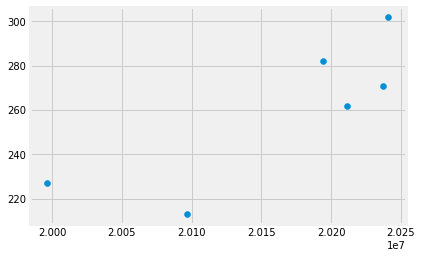

In [163]:
## line plot of total pop vs infection count in la county -- pop v inf in all years
## idea is to produce a similar plot with regression line for every county over all years 
    # (not all years have the same counties)
    

la_inf = list([merge_2013.loc[merge_2013['County']=='Los Angeles']['Infection_Count'].values[0], 
              merge_2014.loc[merge_2014['County']=='Los Angeles']['Infection_Count'].values[0],
              merge_2015.loc[merge_2015['County']=='Los Angeles']['Infection_Count'].values[0], 
              merge_2016.loc[merge_2016['County']=='Los Angeles']['Infection_Count'].values[0],
              merge_2017.loc[merge_2017['County']=='Los Angeles']['Infection_Count'].values[0],
              merge_2018.loc[merge_2018['County']=='Los Angeles']['Infection_Count'].values[0]])
la_pop = list([merge_2013.loc[merge_2013['County']=='Los Angeles']['Total_Population'].values[0], 
              merge_2014.loc[merge_2014['County']=='Los Angeles']['Total_Population'].values[0],
              merge_2015.loc[merge_2015['County']=='Los Angeles']['Total_Population'].values[0], 
              merge_2016.loc[merge_2016['County']=='Los Angeles']['Total_Population'].values[0],
              merge_2017.loc[merge_2017['County']=='Los Angeles']['Total_Population'].values[0],
              merge_2018.loc[merge_2018['County']=='Los Angeles']['Total_Population'].values[0]])
plt.scatter(la_pop,la_inf)

### Working with mrsa merged

In [12]:
mrsa_merged = pd.read_csv('mrsa_merged.csv')
mrsa_merged.head(2)

,Year,State,HAI,Facility1,Facility1_ID,County,Infection_Count,Num_patients
0,2013,California,Methicillin-Resistant Staphylococcus aureus Bl...,"Adventist Medical Center, Reedley",40000124.0,Fresno,0.0,5970.0
1,2013,California,Methicillin-Resistant Staphylococcus aureus Bl...,"AHMC Anaheim Regional Medical Center, Anaheim",60000002.0,Orange,3.0,51929.0


In [12]:
pop_by_county.head()

,Year,County,Total_Population
0,2013,Alameda,3160494
1,2013,Alpine,2254
2,2013,Amador,73250
3,2013,Butte,443328
4,2013,Calaveras,89320


In [15]:
infec_by_county = mrsa_merged.groupby(['Year','County']).agg(sum).reset_index()[['Year','County','Infection_Count']]
infec_by_county.head()

,Year,County,Infection_Count
0,2013,Alameda,18.0
1,2013,Alameda-Contra Costa,2.0
2,2013,Amador,0.0
3,2013,Butte,5.0
4,2013,Calaveras,0.0


In [18]:
# infec_pop_merge = pd.merge(infec_by_county, pop_by_county, how='inner',on=['Year','County']).dropna()
# infec_pop_merge['Infec_Div_Pop'] = infec_pop_merge['Infection_Count']/infec_pop_merge['Total_Population']*100000 
# infec_pop_merge.to_csv('infec_pop_merge.csv',index=False)

In [13]:
infec_pop_merge = pd.read_csv('infec_pop_merge.csv')

In [20]:
infec_pop_merge.loc[infec_pop_merge['County']=='Orange']

,Year,County,Infection_Count,Total_Population,Infec_Div_Pop
28,2013,Orange,43.0,6216018,0.691761
83,2014,Orange,39.0,6260644,0.622939
138,2015,Orange,42.0,6307924,0.665829
193,2016,Orange,51.0,6341414,0.804237
248,2017,Orange,75.0,6359900,1.179264
303,2018,Orange,58.0,6371936,0.910241


In [217]:
def pop_v_infec(county):
    plt.figure(figsize=(10,5))
    
    x = infec_pop_merge.loc[infec_pop_merge['County'] == county]['Total_Population'].tolist()
    y = infec_pop_merge.loc[infec_pop_merge['County'] == county]['Infection_Count'].tolist()
    
    return sns.scatterplot(x,y)

wid_2 = widgets.Dropdown(
        options = infec_pop_merge['County'].unique().tolist(),
        description = 'County',
        disabled = False
)

interact(pop_v_infec, county = wid_2)


interactive(children=(Dropdown(description='County', options=('Alameda', 'Amador', 'Butte', 'Calaveras', 'Colu…

<function __main__.pop_v_infec(county)>

[None]

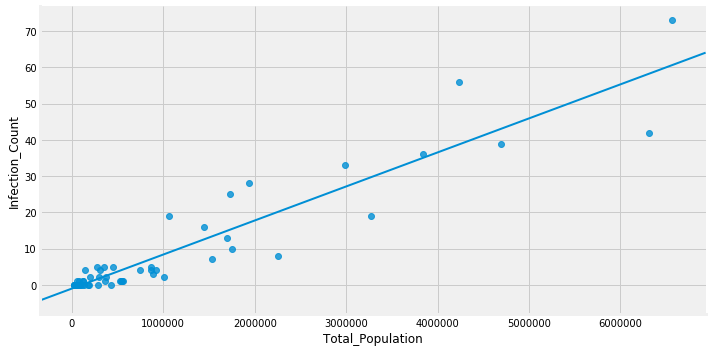

In [249]:
df = infec_pop_merge.loc[infec_pop_merge['Year'] == 2015]
df = df.drop(df['Total_Population'].idxmax())

p = sns.lmplot(x='Total_Population',y='Infection_Count',data=df,ci=None,aspect=2)
plt.setp(p.ax.lines,linewidth=2);

In [225]:
# scatter plot widget - population versus infection rate by year
def pop_v_infec_by_year(year):    
    
    df = infec_pop_merge.loc[infec_pop_merge['Year'] == year]  
    p = sns.lmplot(x='Total_Population',y='Infection_Count',data=df,ci=None,aspect=2)
    plt.title('Population Versus Infection Rate Across Counties Over the Year')
    plt.xlabel("Total Population")
    plt.ylabel("Infection Rate ")
    plt.setp(p.ax.lines,linewidth=2)
    return 

wid_3 = widgets.Dropdown(
        options = infec_pop_merge['Year'].unique().tolist(),
        description = 'Year',
        disabled = False
)

interact(pop_v_infec_by_year, year = wid_3);

interactive(children=(Dropdown(description='Year', options=(2013, 2014, 2015, 2016, 2017, 2018), value=2013), …

# Chloropleth Map

In [7]:
%%capture
!pip install --no-cache-dir shapely
!pip install -U folium
%matplotlib inline
import pandas as pd
import folium
import json
from shapely.geometry import Point, mapping
from shapely.geometry.polygon import Polygon
from shapely import geometry as sg, wkt
# from scripts.espm_module import *
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
plt.style.use('seaborn')

## mapping code credit: ESPM 195 f19 Module

In [8]:
california = geojson.load(open())

NameError: name 'geojson' is not defined

In [ ]:
# mapping California 
def map_ca_counties_with_folium(infec_pop_merge, grouping_criteria, child=None):
    map = folium.Map(location=[36.778259, -119.417931], zoom_start=5) # Creates the starting map location & zoom
    if child: # If a child is given, add it to the map
        map.add_child(child)
    for r in infec_pop_merge.iterrows(): # For ever specimen in the species record, do the following:
        lat, long = r[1]['decimalLatitude'], r[1]['decimalLongitude'] # Get the specimen latitude/longitude
        # Add the specimen to the map
        folium.CircleMarker((lat, long), color=color_dict[r[1][grouping_criteria]]).add_to(map)
    return map

In [10]:
import pandas as pd
import os
import folium

In [30]:
ca_geo = os.path.join('mapping/', 'CA_Counties_TIGER2016.shp')
ca_geo

'mapping/CA_Counties_TIGER2016.shp'

In [31]:
m = folium.Map(location=[40.1999, 122.2011], zoom_start=5)

In [36]:
m.choropleth(
 geo_data=ca_geo,encoding='latin-1')


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 28: invalid continuation byte

In [35]:
import os
import shapefile
from json import dumps

In [43]:
def shape2json(fname, outfile="ca_counties.json", country='USA'):
    reader = shapefile.Reader(fname)
    fields = reader.fields[1:]
    field_names = [field[0] for field in fields]

    data = []
    for sr in reader.shapeRecords():
        atr = dict(zip(field_names, sr.record))
        geom = sr.shape.__geo_interface__
        if country in sr.record[field_names.index('admin')]:
            name = sr.record[field_names.index('name')].decode('latin-1')
            if name in states:
                data.append(dict(type="Feature", geometry=geom, properties=atr))
            
    keys = ['abbrev', 'name', 'name_alt']
    for b in data:
        for key in keys:
            b['properties'][key] = b['properties'][key].decode('latin-1')

    with open(outfile, "w") as geojson:
        geojson.write(dumps({"type": "FeatureCollection",
                             "features": data}, indent=2) + "\n")


shape = 'CA_Counties_TIGER2016.shp'
cartopy_cache = 'mapping/ca-county-boundaries'
fname = os.path.join(os.path.expanduser('~'), cartopy_cache, shape)


In [44]:
shape2json(fname, outfile="ca_counties.json", country='USA')

ShapefileException: Unable to open /home/jovyan/mapping/ca-county-boundaries/CA_Counties_TIGER2016.dbf or /home/jovyan/mapping/ca-county-boundaries/CA_Counties_TIGER2016.shp.

In [ ]:
import folium
import numpy as np
from IPython.display import IFrame


def inline_map(m, width=650, height=500):
    """Takes a folium instance and embed HTML."""
    m._build_map()
    srcdoc = m.HTML.replace('"', '&quot;')
    embed = HTML('<iframe srcdoc="{}" '
                 'style="width: {}px; height: {}px; '
                 'border: none"></iframe>'.format(srcdoc, width, height))
    return embed

bbox = [-82, -32, -45, 10]

lon_center, lat_center = np.array(bbox).reshape(2, 2).mean(axis=0)
mapa = folium.Map(width=650, height=500, zoom_start=4,
                  location=[40.1999, 122.2011])

mapa.geo_json(geo_path='states.json', fill_color='none', line_color='Orange')
inline_map(mapa)

In [69]:
# Attempt 3

import geopandas as gpd
from shapely.geometry import Point
import adjustText as aT

ModuleNotFoundError: No module named 'adjustText'

In [6]:
shapefile = 'mapping/CA_Counties_TIGER2016.shp'
gdf = gpd.read_file(shapefile)[['NAME','geometry']]
gdf.head()

,NAME,geometry
0,Sierra,POLYGON ((-13431319.75097945 4821511.426395644...
1,Sacramento,POLYGON ((-13490651.47641084 4680831.603393857...
2,Santa Barbara,(POLYGON ((-13423116.77225655 4042044.14856006...
3,Calaveras,"POLYGON ((-13428575.483353 4627725.227535474, ..."
4,Ventura,(POLYGON ((-13317853.59433417 3931602.41399276...


In [65]:
merged = gdf.set_index('NAME').join(infec_pop_merge.set_index('County'))
merged["center"] = merged["geometry"].centroid
merged_points = merged.copy().reset_index()
merged_points.set_geometry("center", inplace = True)
merged.head()

,geometry,Year,Infection_Count,Total_Population,Infec_Div_Pop,center
Alameda,POLYGON ((-13612246.76328248 4538150.085244546...,2013.0,18.0,3160494.0,0.569531,POINT (-13571851.91615842 4530207.177611062)
Alameda,POLYGON ((-13612246.76328248 4538150.085244546...,2014.0,21.0,3217348.0,0.652711,POINT (-13571851.91615842 4530207.177611062)
Alameda,POLYGON ((-13612246.76328248 4538150.085244546...,2015.0,19.0,3269268.0,0.581170,POINT (-13571851.91615842 4530207.177611062)
Alameda,POLYGON ((-13612246.76328248 4538150.085244546...,2016.0,24.0,3300612.0,0.727138,POINT (-13571851.91615842 4530207.177611062)
Alameda,POLYGON ((-13612246.76328248 4538150.085244546...,2017.0,19.0,3316262.0,0.572934,POINT (-13571851.91615842 4530207.177611062)


In [66]:
merged_points.head()

,index,geometry,Year,Infection_Count,Total_Population,Infec_Div_Pop,center
0,Alameda,POLYGON ((-13612246.76328248 4538150.085244546...,2013.0,18.0,3160494.0,0.569531,POINT (-13571851.91615842 4530207.177611062)
1,Alameda,POLYGON ((-13612246.76328248 4538150.085244546...,2014.0,21.0,3217348.0,0.652711,POINT (-13571851.91615842 4530207.177611062)
2,Alameda,POLYGON ((-13612246.76328248 4538150.085244546...,2015.0,19.0,3269268.0,0.581170,POINT (-13571851.91615842 4530207.177611062)
3,Alameda,POLYGON ((-13612246.76328248 4538150.085244546...,2016.0,24.0,3300612.0,0.727138,POINT (-13571851.91615842 4530207.177611062)
4,Alameda,POLYGON ((-13612246.76328248 4538150.085244546...,2017.0,19.0,3316262.0,0.572934,POINT (-13571851.91615842 4530207.177611062)


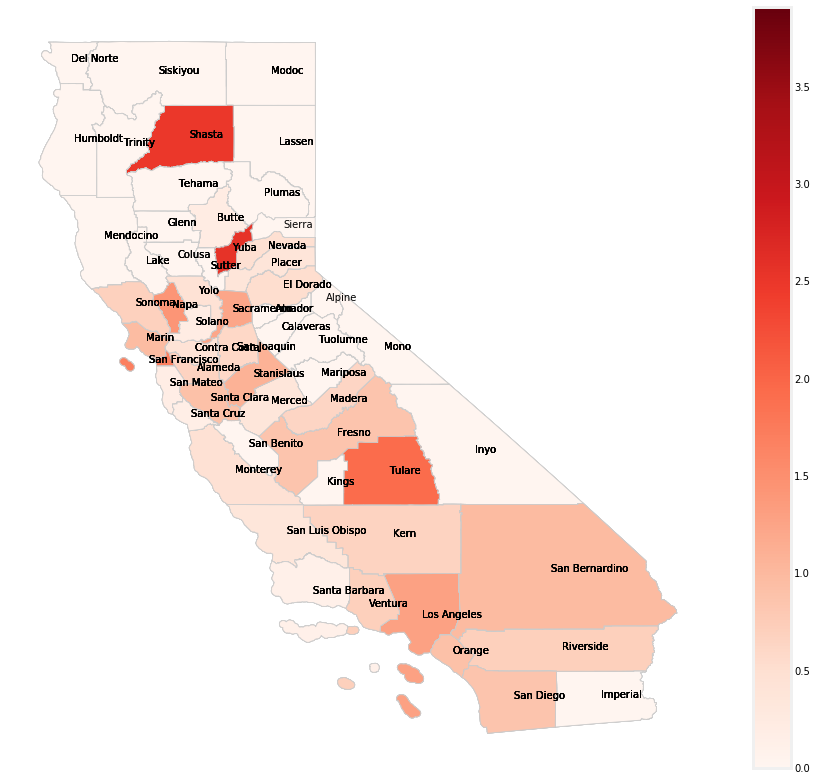

In [94]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'Infec_Div_Pop'
# # set the range for the choropleth
# vmin, vmax = merged[variable].min(),merged[variable].max()
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(14, 14))

merged.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8',legend=True)

ax.axis('off')
#ax.set_title('California Counties Colored by Infection Rate (number of infections/population)')

# sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# sm._A = []
# cbar = fig.colorbar(sm)
texts = []

for x, y, label in zip(merged_points.geometry.x, merged_points.geometry.y, merged_points["index"]):
    texts.append(plt.text(x, y, label, fontsize = 10))

# aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1), 
#                arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))
fig.savefig('ca_map.png', dpi=300, facecolor='w', transparent=False)